# Imports packages

In [1]:
# we will import everything here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from task_1 import read_file, center_data, reduce_dim_pca

%reload_ext autoreload 
%autoreload 2 

# Task 1/4: Principal component analysis -- PART 1

## Read the input file 'pca_dataset.txt'

Text(0, 0.5, 'f(x)')

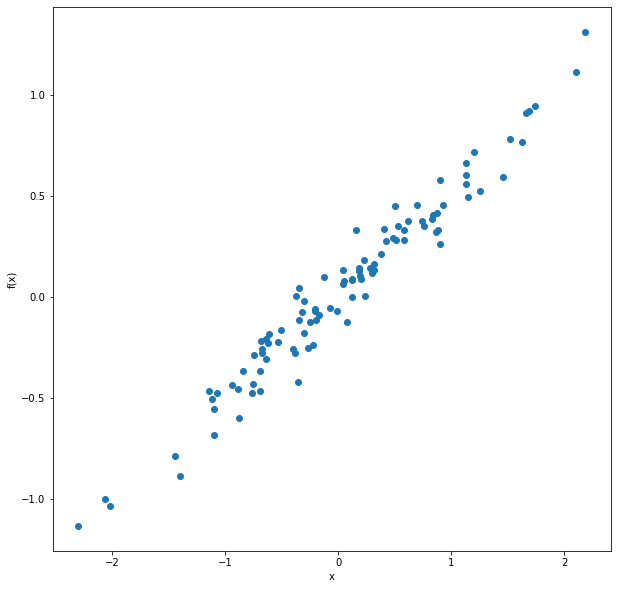

In [2]:
data_x = read_file("pca_dataset.txt", 0, "x")
data_y = read_file("pca_dataset.txt", 1, "f(x)")

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(data_x, data_y)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
#fig.savefig("ex0-figure.pdf")

## PCA 1/2: Center the data

Text(0.5, 1.0, 'X_centered')

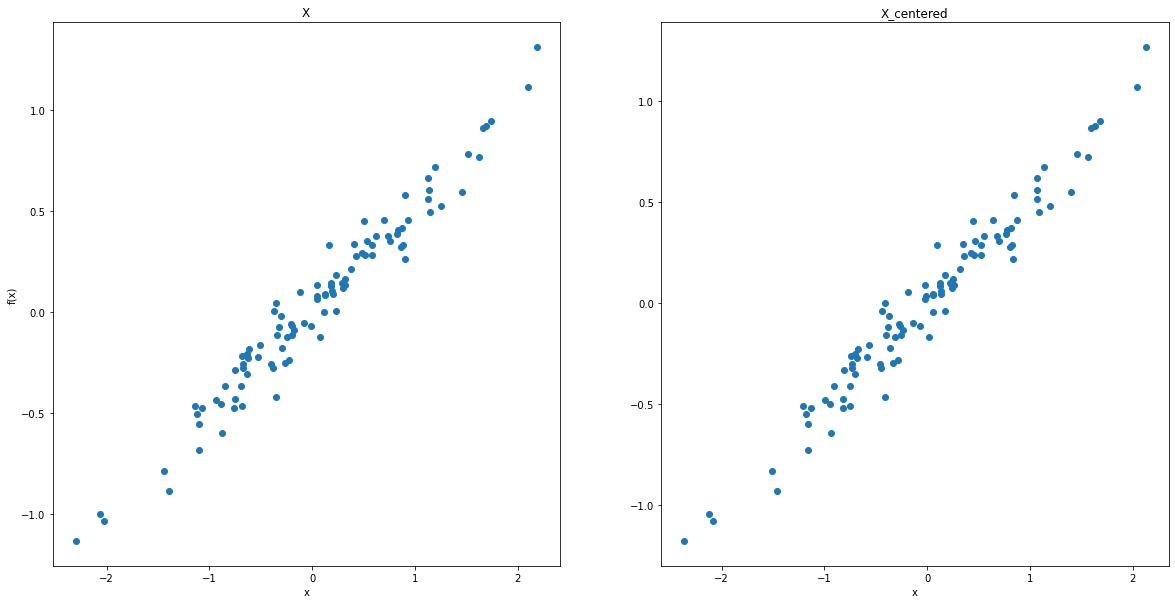

In [3]:
# Create the matrix X with dimension (N, 2). Each sample has the dimension 2
X = np.column_stack((data_x, data_y))

# Center the matrix
X_centered = center_data(X)

# plot the centered data
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(data_x, data_y)
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_title("X")

ax[1].scatter(X_centered.T[0], X_centered.T[1])
ax[1].set_xlabel("x")
ax[1].set_title("X_centered")

## PCA 2/2: Compute SVD and approximate one-dimensional representation

(BLACK) First column of V: [-0.88938337 -0.45716213]
(RED) Second column of V: [ 0.45716213 -0.88938337]
First principal component: 9.943404944386826
Second principal component: 0.8262420091547046


Text(0.5, 1.0, 'X_projected with principal components')

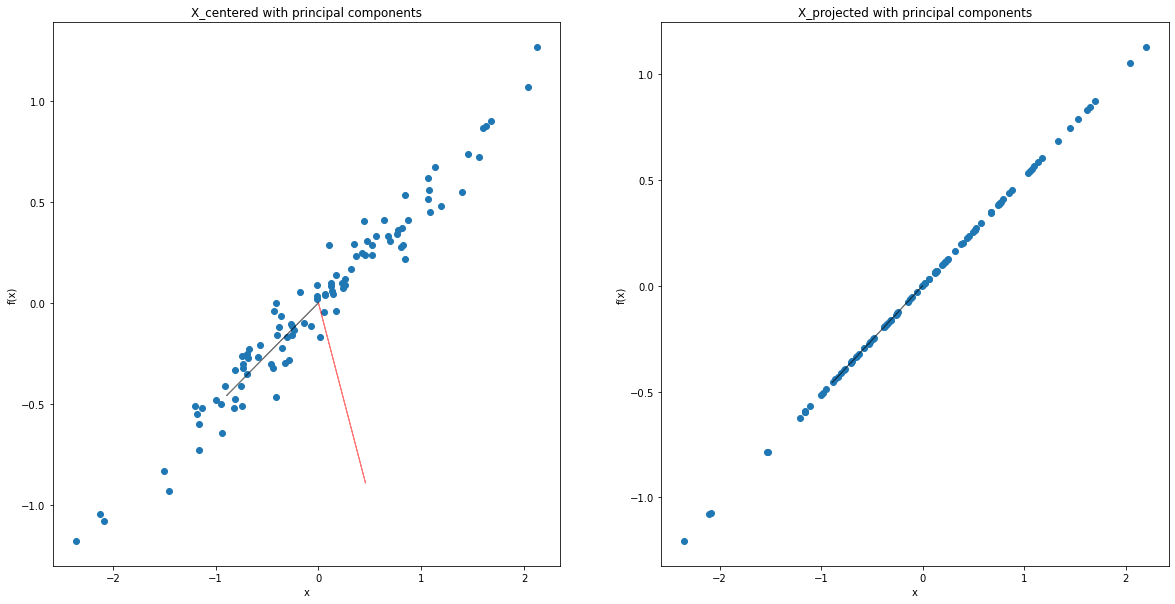

In [4]:
# apply SVD 
U, S, Vh = np.linalg.svd(X_centered)

print("(BLACK) First column of V:",Vh[0])
print("(RED) Second column of V:", Vh[1])

print("First principal component:", S[0])
print("Second principal component:", S[1])

# Compute the SVD and truncate the lowest variance dimensions such that only top k (= 1 in this task) singular values are used
# In this case the red principal component will be removed since the varianca of the data around this dimension is very low
# compared to the black line (the data is would be more representable -- spread across the black line if we project the data
# samples onto the black line. However this is not the case with the red line. If we project the points onto the red line 
# then the most of the data would lie on a small interval on this red line which is because of the low variance.)
X_centered_trunc = reduce_dim_pca(X_centered, 1)

# Plot the principal component directions and the projected data
X_projected = (X_centered_trunc * Vh[0])

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].scatter(X_centered.T[0], X_centered.T[1])
ax[0].arrow(0, 0, Vh[0][0], Vh[0][1], alpha=0.5)
ax[0].arrow(0, 0, Vh[1][0], Vh[1][1], alpha=0.5, color='red')
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_title("X_centered with principal components")

ax[1].scatter(X_projected.T[0], X_projected.T[1])
ax[1].arrow(0, 0, Vh[0][0], Vh[0][1], alpha=0.5)
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
ax[1].set_title("X_projected with principal components")

# Task 1/4: Principal component analysis -- PART 2